Importing Needed Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import copy
import math
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import wordcloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import nltk
import warnings
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
import string
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, kruskal
# from gensim.models import Word2Vec
from collections import Counter
import unicodedata
import csv
import emoji
from tensorflow.keras.layers import  Input, Concatenate
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB


PreProcessing Data

In [2]:
data = pd.read_csv("D:/FCIS/Sophomore/Second Semester/AI/AI_Project/sentimentdataset.csv")

In [3]:
data.head()

,ID,Text,Sentiment (Label),Timestamp,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [4]:
#Seeing Data Nulls and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 732 non-null    int64 
 1   Text               732 non-null    object
 2   Sentiment (Label)  732 non-null    object
 3   Timestamp          732 non-null    object
 4   User               732 non-null    object
 5   Source             732 non-null    object
 6   Topic              732 non-null    object
 7   Retweets           732 non-null    int64 
 8   Likes              732 non-null    int64 
 9   Country            732 non-null    object
 10  Year               732 non-null    int64 
 11  Month              732 non-null    int64 
 12  Day                732 non-null    int64 
 13  Hour               732 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 80.2+ KB


In [5]:
#Seeing Data duplicates
data.duplicated().sum()

0

### No Nulls or duplicates found

In [6]:
data["Sentiment (Label)"].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

### THERE ARE MANY CLASSES THAT NEED TO BE CALSSIFIED INTO (POSITIVE - NEGATIVE - NEUTRAL)

### Functions used in the project

In [7]:
# A function to convert a date and time string to Unix timestamp
def to_unix_timestamp(date_string):
    date_object = datetime.strptime(date_string, '%m/%d/%Y %H:%M')
    return int(date_object.timestamp())


In [8]:
def preprocess_text(text):
    tokens = word_tokenize(text) # Removing unorganized strings 
    stopwords_list = set(stopwords.words('english'))
    punctuation = string.punctuation
    text = ' '.join(tokens)  # Join tokens into a single string
    text = text.translate(str.maketrans("", "", punctuation))  # Remove punctuation
    text = emoji.demojize(text)  # Remove emojis
    tokens = [token.lower() for token in text.split() if token.lower() not in stopwords_list]
    return tokens


In [9]:
#here this function check over the words and return words to its basic
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
def get_wordnet_pos(tag):
    tag = tag[0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
def Lemma(x):

    lemmatizer = WordNetLemmatizer()
    lemmatized_entry = [lemmatizer.lemmatize(token, pos=get_wordnet_pos(tag)) for token, tag in nltk.pos_tag(x)]
    return lemmatized_entry
    

In [10]:
#this function takes list of cleanned tokens and then identify if the word is positive, negative or neutral and if a list of words then we get the total score of it
def classify_sentiment(tokens):
    
    sia = SentimentIntensityAnalyzer()
    result = 0
    for token in tokens:
        sentiment_score = [sia.polarity_scores(token)['compound']]
    for s in sentiment_score:
        if s > 0.1:
            result=result+1
        elif s < -0.1:
            result=result-1
        else:
            result=result+0
    if result>0:
        return "Positive"
    if result<0:
        return "Negative"
    else:
        return "Neutral"

In [11]:
# Numerical encoding
numerical_encoding = {
    "Positive": 1,
    "Neutral": 0,
    "Negative": -1
}

In [12]:
# Free-Spirited Issue

data['Sentiment (Label)'] = data['Sentiment (Label)'].str.replace('-', ' ')

### Preprocessing the data and cleaning data text

In [13]:
#preprocessign and classifying The Label
new_sentiment=[]

for val in data['Sentiment (Label)']:
    new_sentiment.append(classify_sentiment(Lemma(preprocess_text(val))))

data['new_sentiment']=new_sentiment

     

In [14]:
data.columns

Index(['ID', 'Text', 'Sentiment (Label)', 'Timestamp', 'User', 'Source',
       'Topic', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'new_sentiment'],
      dtype='object')

In [15]:
data['Sentiment (Label)'] = data['Sentiment (Label)'].str.replace(' ', '')

In [16]:
# Replace 'sentiment_column' and 'neutral_positive_negative_column' with your actual column names
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Filter rows where sentiment corresponds to 'neutral' in the other column
neutral_sentiments = data[data['new_sentiment'] == 'Neutral']['Sentiment (Label)'].unique()

neutral_sentiments


array(['Neutral', 'Awe', 'Serenity', 'Empowerment', 'Arousal',
       'Fulfillment', 'Reverence', 'Curiosity', 'Indifference',
       'Nostalgia', 'Ambivalence', 'Zest', 'Yearning', 'Apprehensive',
       'Overwhelmed', 'Dismissive', 'Bittersweet', 'Contemplation',
       'JoyfulReunion', 'Reflection', 'Accomplishment', 'Wonderment',
       'Enchantment', 'Intrigue', 'PlayfulJoy', 'Mindfulness',
       'DreamChaser', 'Whimsy', 'Pensive', 'Wonder', 'Rejuvenation',
       'Melodic', 'FestiveJoy', 'InnerJourney', 'Dazzle', 'Adrenaline',
       'ArtisticBurst', 'CulinaryOdyssey', 'Resilience', 'Immersion',
       'EmotionalStorm', 'LostLove', 'Desolation', 'Heartache',
       'Solitude', 'Captivation', 'Emotion', 'Celebration', 'Colorful',
       'Hypnotic', 'Connection', 'Iconic', 'Journey', 'Touched',
       'Suspense', 'RenewedEffort', 'Miscalculation', 'Challenge',
       'Solace', 'Breakthrough', 'JoyinBaking', 'EnvisioningHistory',
       'Imagination', 'Vibrancy', 'Mesmerizing', 'Wi

### Some logical implacement for the sentimental calssified data to nutral that supposed to be positive or negative

In [17]:
positive_words = [
    "Awe", "Serenity", "Empowerment", "Arousal", "Fulfillment", "Reverence",
    "Curiosity", "Zest", "JoyfulReunion", "Reflection", "Accomplishment", "Wonderment",
    "Enchantment", "Intrigue", "PlayfulJoy", "Mindfulness", "DreamChaser", "Whimsy",
    "Wonder", "Rejuvenation", "Melodic", "FestiveJoy", "InnerJourney", "Dazzle",
    "Adrenaline", "ArtisticBurst", "CulinaryOdyssey", "Resilience", "Immersion",
    "Celebration", "Colorful", "Hypnotic", "Connection", "Iconic", "Journey", "Touched",
    "Breakthrough", "JoyinBaking", "EnvisioningHistory", "Imagination", "Vibrancy",
    "Mesmerizing", "WinterMagic", "ThrillingJourney", "CelestialWonder", "Nostalgia", "Emotion", "WhispersofthePast","RenewedEffort"
]

negative_words = [
    "Apprehensive", "Overwhelmed", "Dismissive", "Bittersweet", "EmotionalStorm",
    "LostLove", "Desolation", "Heartache", "Pensive", "Challenge", "Miscalculation"
]

neutral_words = [
    "Neutral","Indifference", "Ambivalence", "Yearning", "Solitude",
    "Captivation", "Suspense", "Solace",
    "Mischievous","Contemplation"
]


In [18]:
def determine_sentiment(text):
    if any(word in text for word in positive_words):
        return 'Positive'
    elif any(word in text for word in negative_words):
        return 'Negative'
    elif any(word in text for word in neutral_words):
        return 'Neutral'
    else:
        return 'unknown' 
    
data.loc[data['new_sentiment'] == 'Neutral', 'new_sentiment'] = data[data['new_sentiment'] == 'Neutral']['Sentiment (Label)'].apply(determine_sentiment)

data['new_sentiment'].unique

<bound method Series.unique of 0      Positive
1      Negative
2      Positive
3      Positive
4       Neutral
5      Positive
6      Positive
7      Positive
8      Negative
9       Neutral
10     Positive
11     Negative
12     Positive
13     Positive
14      Neutral
15     Positive
16     Positive
17     Positive
18      Neutral
19     Negative
20     Positive
21     Positive
22     Positive
23     Positive
24     Positive
25     Positive
26     Positive
27     Positive
28     Positive
29     Positive
30     Positive
31     Positive
32     Positive
33     Positive
34     Positive
35     Positive
36     Positive
37     Positive
38     Positive
39     Positive
40     Positive
41     Positive
42     Positive
43     Positive
44     Positive
45     Positive
46     Positive
47     Positive
48     Positive
49     Positive
50     Positive
51     Positive
52     Negative
53     Negative
54     Negative
55     Negative
56     Positive
57     Positive
58     Positive
59     Positive
60     Po

In [19]:
data['new_sentiment'].value_counts()

new_sentiment
Positive    496
Negative    195
Neutral      41
Name: count, dtype: int64

In [20]:
unknown_sentiment_values = data[data['new_sentiment'] == 'unknown']

In [21]:
new_text=[]
for value in data['Text']:
    new_text.append(Lemma(preprocess_text(value)))

data['Text']=new_text

In [22]:
data['Text']

0                          [enjoy, beautiful, day, park]
1                           [traffic, terrible, morning]
2              [finish, amaze, workout, :flexed_biceps:]
3                  [excited, upcoming, weekend, getaway]
4                    [try, new, recipe, dinner, tonight]
5                  [feel, grateful, little, thing, life]
6          [rainy, day, call, cozy, blanket, hot, cocoa]
7                       [new, movie, release, mustwatch]
8                [political, discussion, heat, timeline]
9                       [miss, summer, vibe, beach, day]
10                     [publish, new, blog, post, check]
11                           [feel, bit, weather, today]
12                          [explore, city, hidden, gem]
13      [new, year, new, fitness, goal, :flexed_biceps:]
14                       [technology, change, way, live]
15                          [reflect, past, look, ahead]
16            [adopt, cute, furry, friend, :paw_prints:]
17                    [latenigh

In [23]:
data_str = [' '.join(str(word) for word in row).replace('[','').replace(']','').replace("'", '').replace(',', '') for row in data['Text']]
data['Text']= data_str

In [24]:
#the # problem in topics
data['Topic'] = data['Topic'].str.replace('#', ' ')

In [25]:
data['Topic']

0               Nature  Park                            
1               Traffic  Morning                        
2               Fitness  Workout                        
3               Travel  Adventure                       
4               Cooking  Food                           
5                 Gratitude  PositiveVibes              
6               RainyDays  Cozy                         
7                MovieNight  MustWatch                  
8                Politics  Debate                       
9                Summer  BeachDays                      
10               Blogging  NewPost                      
11               SickDay  Health                        
12               CityExplore  HiddenGems                
13               NewYear  FitnessGoals                  
14               Tech  Innovation                       
15               Reflection  Future                     
16               PetAdoption  FurryFriend               
17               Gaming  LateNi

In [26]:
#removing the space in the topic to be able to split the topic col
data['Topic'] = data['Topic'].str.lstrip()

In [27]:
data['Topic']

0             Nature  Park                            
1             Traffic  Morning                        
2             Fitness  Workout                        
3             Travel  Adventure                       
4             Cooking  Food                           
5               Gratitude  PositiveVibes              
6             RainyDays  Cozy                         
7              MovieNight  MustWatch                  
8              Politics  Debate                       
9              Summer  BeachDays                      
10             Blogging  NewPost                      
11             SickDay  Health                        
12             CityExplore  HiddenGems                
13             NewYear  FitnessGoals                  
14             Tech  Innovation                       
15             Reflection  Future                     
16             PetAdoption  FurryFriend               
17             Gaming  LateNight                      
18        

In [28]:
data[['Topic1', 'Topic2']] = data['Topic'].str.split(' ', n=1, expand=True)


In [29]:
data['Topic1']

0                      Nature
1                     Traffic
2                     Fitness
3                      Travel
4                     Cooking
5                   Gratitude
6                   RainyDays
7                  MovieNight
8                    Politics
9                      Summer
10                   Blogging
11                    SickDay
12                CityExplore
13                    NewYear
14                       Tech
15                 Reflection
16                PetAdoption
17                     Gaming
18                         AI
19                WinterBlues
20                    Reading
21                         VR
22               Productivity
23                    Fitness
24                     Career
25                     Brunch
26           LanguageLearning
27                    Reading
28               MentalHealth
29                        Art
30                   RoadTrip
31                    TeaTime
32                     Coding
33        

In [30]:
# Removing spaces
data['Country']=data['Country'].str.strip()

In [31]:
data['Country'].unique()

array(['USA', 'Canada', 'UK', 'Australia', 'India', 'France', 'Brazil',
       'Japan', 'Greece', 'Germany', 'Sweden', 'Italy', 'Netherlands',
       'South Africa', 'Spain', 'Portugal', 'Switzerland', 'Austria',
       'Belgium', 'Denmark', 'Czech Republic', 'Jordan', 'Peru',
       'Maldives', 'China', 'Cambodia', 'Norway', 'Colombia', 'Ireland',
       'Jamaica', 'Kenya', 'Scotland', 'Thailand'], dtype=object)

In [32]:
country_appear = data['Country'].value_counts()
country_appear

Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Sweden              2
Colombia            1
Scotland            1
Kenya               1
Jamaica             1
Ireland             1
China               1
Norway              1
Cambodia            1
Maldives            1
Peru                1
Jordan              1
Thailand            1
Name: count, dtype: int64

In [33]:
data['Month'].unique()

array([ 1,  2,  3,  5,  8,  6, 11,  4,  9,  7, 10, 12], dtype=int64)

### VISUALISING DATA AND FURTHER UNDERSTANDING

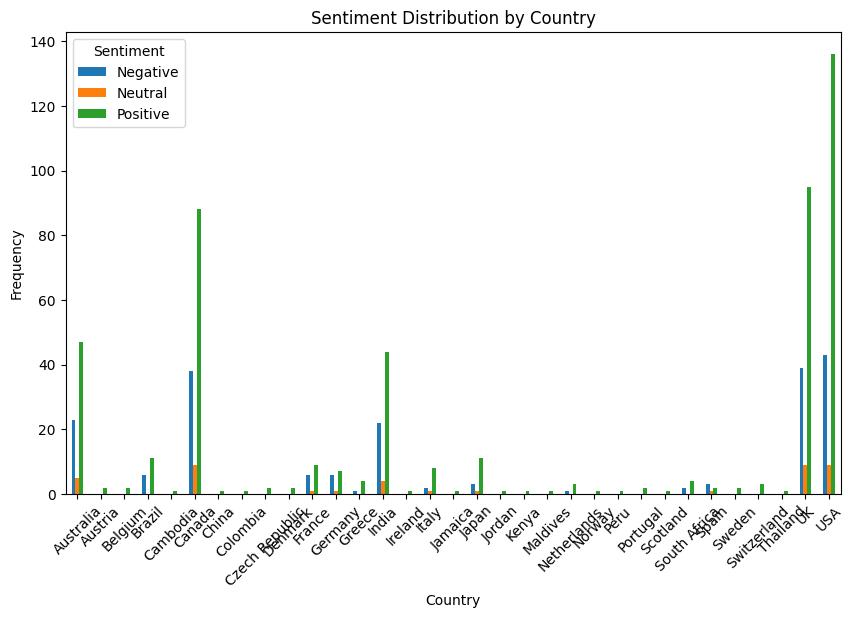

In [34]:
contingency_table = pd.crosstab(data['Country'], data['new_sentiment'])

# Plot grouped bar chart
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

from here we can see that the data is biased a bit towards Canada, Australia, USA, UK and India

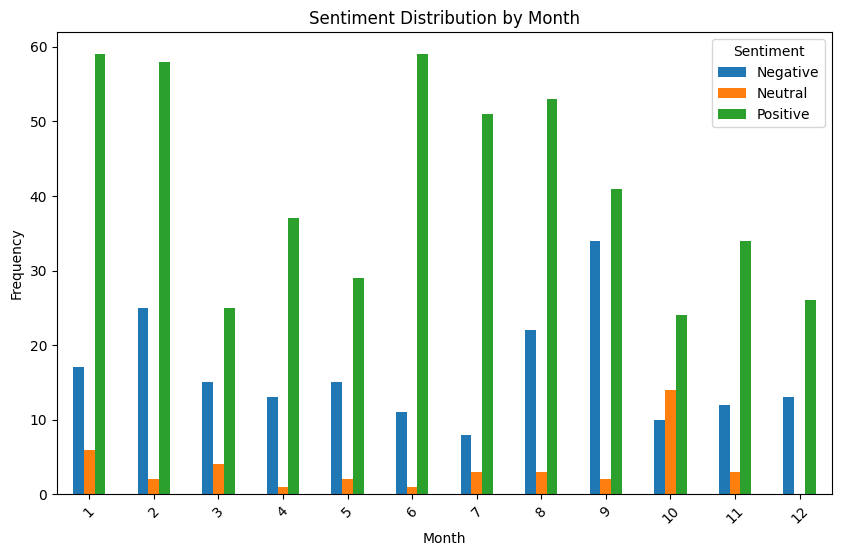

In [35]:
contingency_table = pd.crosstab(data['Month'], data['new_sentiment'])

# Plot grouped bar chart
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

here we can see that there is a slight relation between the month and the Label 

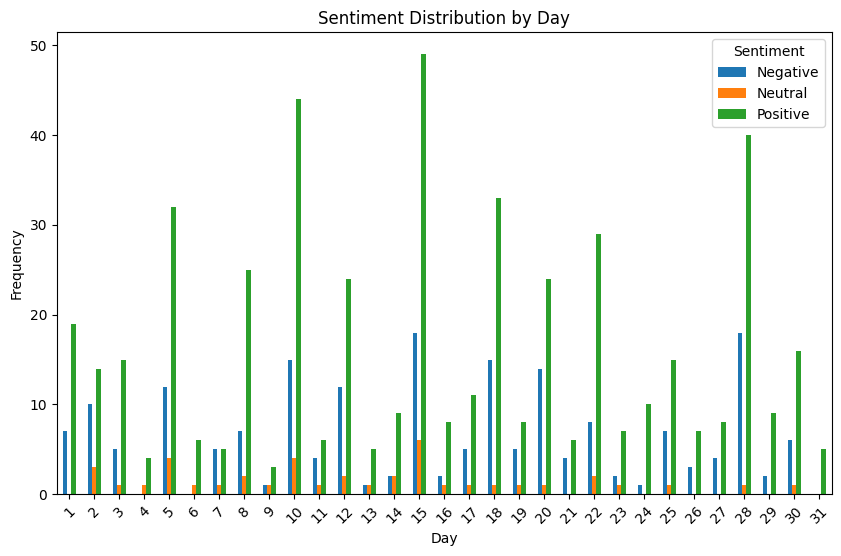

In [36]:
contingency_table = pd.crosstab(data['Day'], data['new_sentiment'])

# Plot grouped bar chart
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution by Day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

seems to me there is no clear relationship between the day and the Label

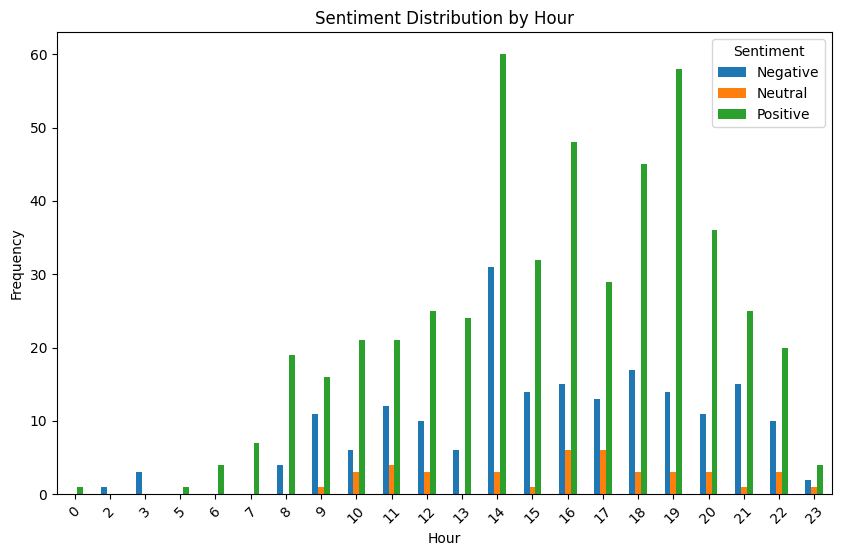

In [37]:
contingency_table = pd.crosstab(data['Hour'], data['new_sentiment'])

# Plot grouped bar chart
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

as seen here we can see a strong realtion between the hour and the sentiment as seen from the distribution and it seems that more data is recorded starting from the 8 am till 10 pm

### Analysing Trends and people opinions and experiences

In [38]:
topic_engagement = data.groupby('Topic').agg({'Retweets': 'sum', 'Likes': 'sum'})

most_engaged_topics = topic_engagement.nlargest(15, ['Retweets', 'Likes'])

#here we can see the most engadging topics 
print("Most Engaged Topics:")
print(most_engaged_topics)



Most Engaged Topics:
                                          Retweets  Likes
Topic                                                    
Wonder  StargazingAdventure                     80    160
Playful  CarnivalEscapade                       72    144
Harmony  MusicalUnity                           70    140
Proud  ScalingPeaks                             69    138
Compassionate  TearsOfEmpathy                   63    126
Coziness  WarmWinterEvening                     60    120
Inspiration  ForestWhispers                     56    110
Playful  JugglingResponsibilities               50    100
Radiance  SpringBlooms                          50    100
TimelessTunes  SeniorJazz                       50    100
Confident  DanceOfLife                          46     92
Gratitude  FamilyLaughter                       44     90
FreeSpirit  WingsOfDreams                       44     88
Hopeful  SeedsOfOptimism                        42     84
Anticipation  AdventureAwaits                   40 

In [39]:
# Seeing the most negative text and topics that people engaged with assumig that the most engaged topics with negative label touches more people 

negative_sentiment_data = data[data['new_sentiment'] == 'Negative']

negative_sentiment_data['Engagement'] = negative_sentiment_data['Retweets'] + negative_sentiment_data['Likes']
most_engaged_negative = negative_sentiment_data.nlargest(10, 'Engagement')

print("Most Engaged Negative Sentiment Text:")
print(most_engaged_negative[['Text', 'Topic', 'new_sentiment', 'Retweets', 'Likes']])


Most Engaged Negative Sentiment Text:
                                                  Text  \
432   heartache deepens solitary journey abyss despair   
550  series defeat soccer team face disappointment ...   
429  isolation deepen emotional winter warmth dista...   
435  emotional exhaustion weight world crush weary ...   
551  tennis tournament highly anticipate player exp...   
558  weightlifter fail attempt personal record resu...   
8                   political discussion heat timeline   
104            confusion surround navigate life choice   
447  tear ink stain page journal testament silent g...   
450    suffocate silence solitude echo laughter thrive   

                                           Topic new_sentiment  Retweets  \
432       Despair  AbyssOfHeartache                   Negative        40   
550               Disappointment  SoccerDefeats       Negative        40   
429       Isolation  EmotionalWinter                  Negative        35   
435       Exhaustio

C:\Users\Dell\AppData\Local\Temp\ipykernel_22468\2317154837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentiment_data['Engagement'] = negative_sentiment_data['Retweets'] + negative_sentiment_data['Likes']


we need to know more about the reasons behind these to improve the people experience

Most appeared country

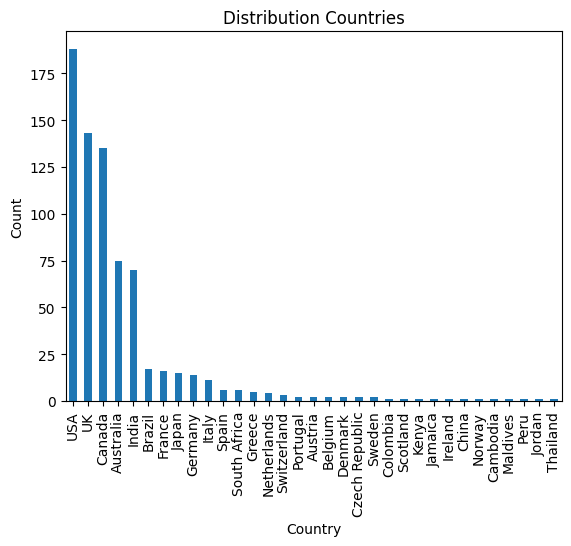

In [40]:
data['Country'].value_counts().plot(kind='bar')
plt.title("Distribution Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [41]:
# We want to print the top 10 countries according to frequency
countries = data['Country'].unique()
size = data['Country'].count()
cntr = 0
country_freq = {}
for i in countries:
    country_freq[i] = data['Country'].value_counts()[i]/ size * 100
country_freq =  dict(sorted(country_freq.items(), key=lambda item: item[1], reverse= True))

count = 0
for key, value in country_freq.items():
    print(key, ':', value)
    count += 1
    if count == 10:
        break
vals = list(country_freq.values())
print("\npercentage of top 10: ", np.sum(vals[:10]))
print("percentage of top 4: ", np.sum(vals[:4]))

USA : 25.683060109289617
UK : 19.53551912568306
Canada : 18.442622950819672
Australia : 10.245901639344263
India : 9.562841530054644
Brazil : 2.3224043715846996
France : 2.185792349726776
Japan : 2.0491803278688523
Germany : 1.912568306010929
Italy : 1.5027322404371584

percentage of top 10:  93.44262295081967
percentage of top 4:  73.90710382513662


### Analysing Social Media Source

In [42]:
data['Source'].unique()

array([' Twitter  ', ' Instagram ', ' Facebook ', ' Twitter '],
      dtype=object)

In [43]:
data['Source']=data['Source'].str.strip()

In [44]:
data['Source'].value_counts()

Source
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

##### Using WorldCloud to analyse text

Analyzing Text according to top 10 countries

In [45]:
top_countries = []
count = 0
for key, value in country_freq.items():
    top_countries.append(key)
    count += 1
    if count == 10:
        break
top_countries

['USA',
 'UK',
 'Canada',
 'Australia',
 'India',
 'Brazil',
 'France',
 'Japan',
 'Germany',
 'Italy']

world cloud of USA :


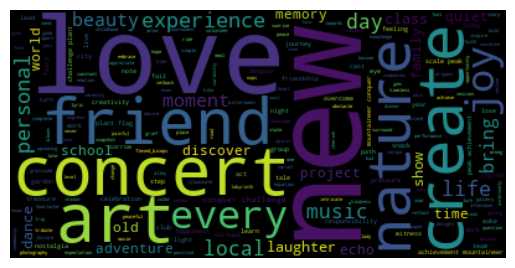

world cloud of UK :


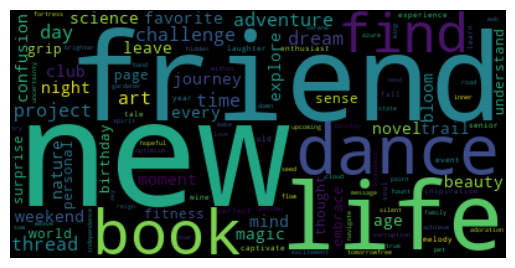

world cloud of Canada :


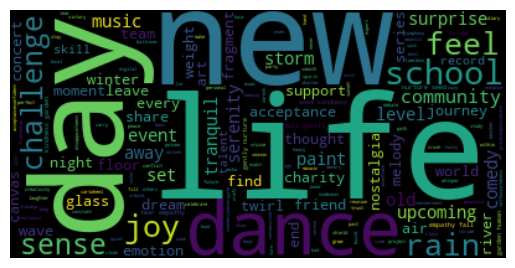

world cloud of Australia :


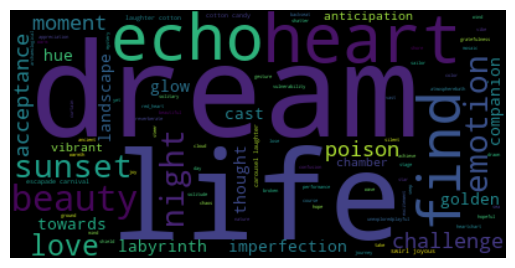

world cloud of India :


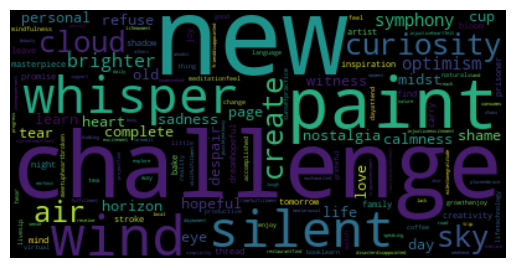

world cloud of Brazil :


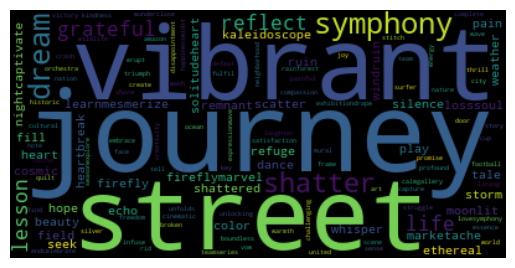

world cloud of France :


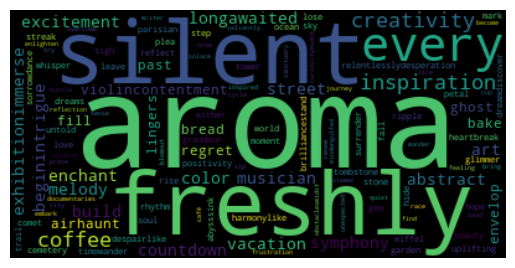

world cloud of Japan :


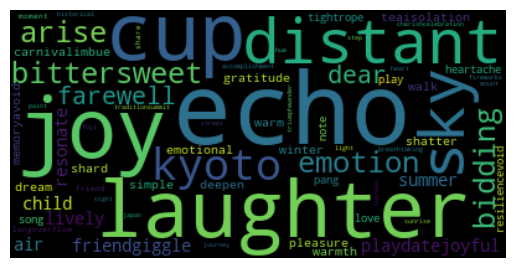

world cloud of Germany :


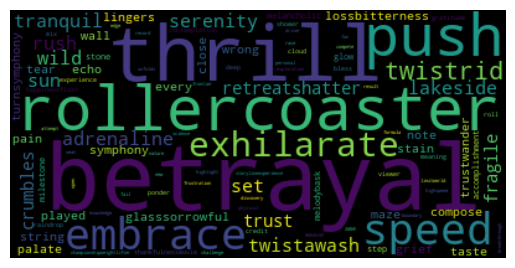

world cloud of Italy :


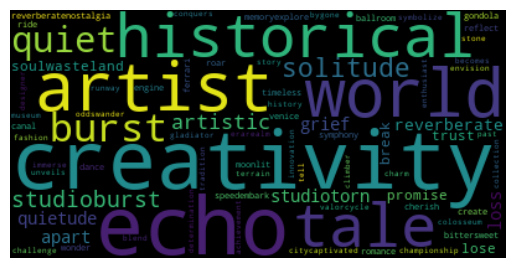

In [46]:
from wordcloud import WordCloud
for i in range(len(top_countries)):
    # text = all texts from country i
    text = ""
    for j in range(data['Text'].size):
        if data['Country'][j] == top_countries[i]:
            text += data['Text'][j] 
    wordcloud = WordCloud().generate(text)
    print("world cloud of", top_countries[i], ":")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Word cloud of year 2010 :


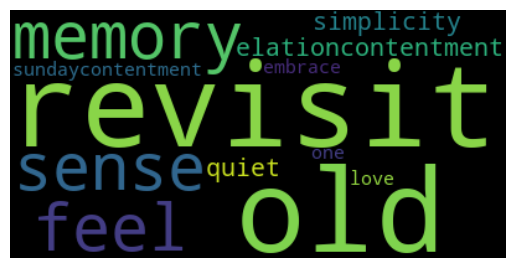

Word cloud of year 2011 :


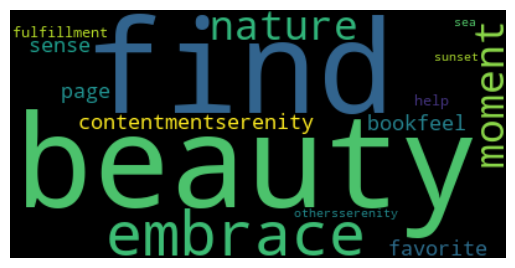

Word cloud of year 2012 :


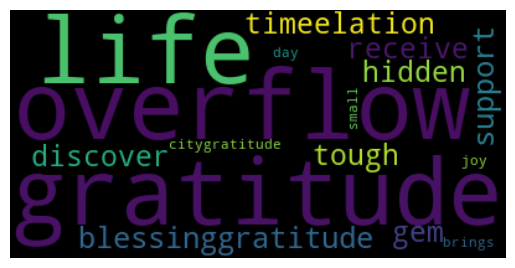

Word cloud of year 2013 :


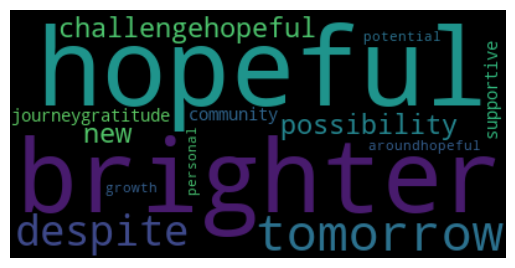

Word cloud of year 2014 :


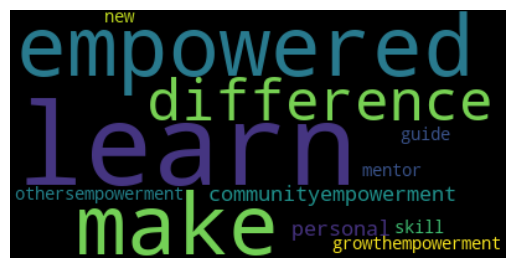

Word cloud of year 2015 :


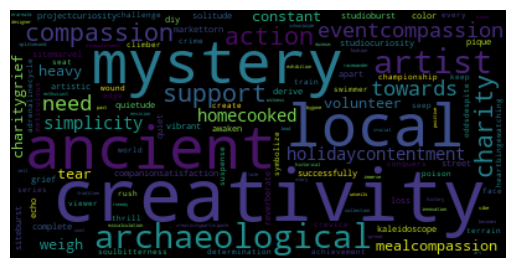

Word cloud of year 2016 :


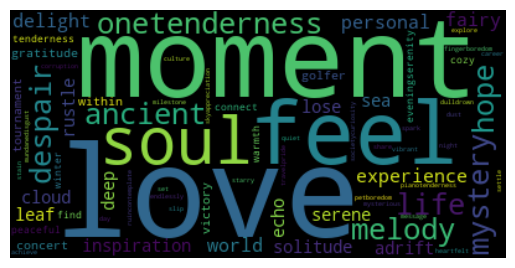

Word cloud of year 2017 :


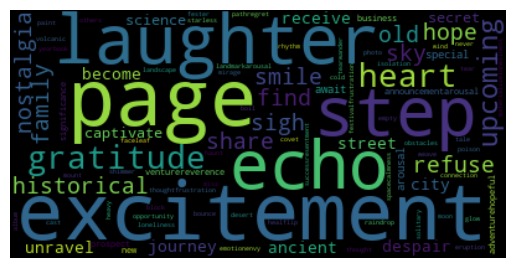

Word cloud of year 2018 :


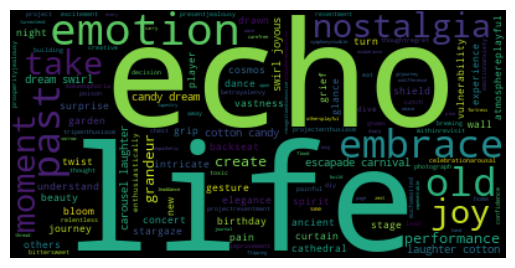

Word cloud of year 2019 :


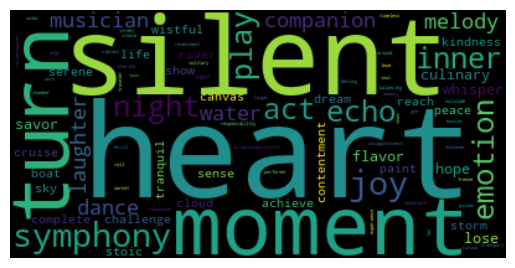

Word cloud of year 2020 :


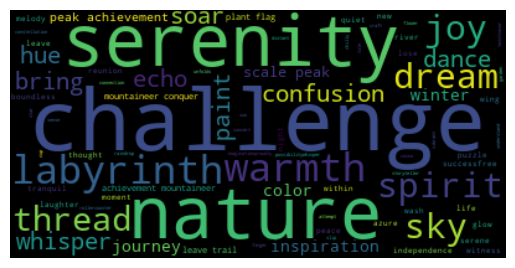

Word cloud of year 2021 :


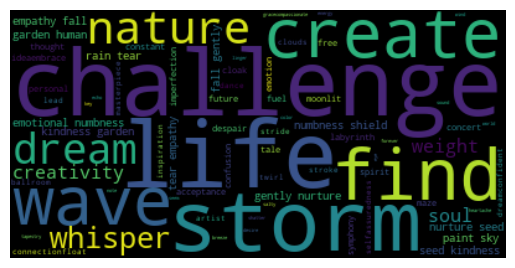

Word cloud of year 2022 :


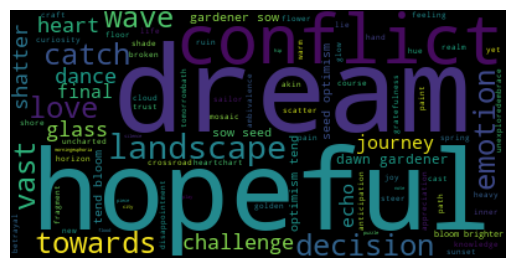

Word cloud of year 2023 :


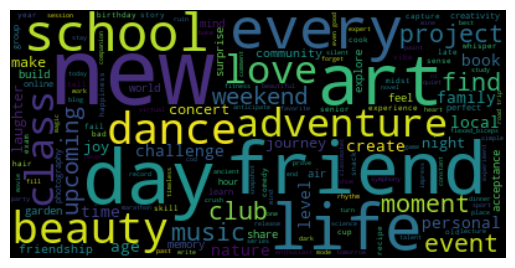

In [47]:
import pandas as pd

# Assuming 'Timestamp' column is currently string objects
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

years = range(2010, 2024)
for year in years:
    # text = all texts from year i
    text = ""
    for t, tm in zip(data['Text'], data['Timestamp']):
        if tm.year == year:
            text += t
    
    wordcloud = WordCloud().generate(text)
    print("Word cloud of year", year, ":")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


### In what we have seen we can understand what was the most talked about in countries and through years and what is the most engaging topics and so we have seen what were the trends and what is the negative points we need to improve

### Encoding and the continue of preprocessing data

In [48]:
new_timeStamp=[]
# Assuming 'Timestamp' column is currently datetime objects
data['Timestamp'] = data['Timestamp'].apply(lambda x: pd.to_datetime(x).strftime('%m/%d/%Y %H:%M'))

for val in data['Timestamp']:
    new_timeStamp.append(to_unix_timestamp(val))

data['new_timeStamp']=new_timeStamp

# Print the DataFrame with the new column of Unix timestamps
print(data['new_timeStamp'])

0      1673778600
1      1673765100
2      1673790300
3      1673799600
4      1673805300
5      1673853000
6      1673873100
7      1673890200
8      1673935200
9      1673950800
10     1673961300
11     1674030600
12     1674046200
13     1674057600
14     1674114300
15     1674127200
16     1674141000
17     1674165900
18     1674207000
19     1674220500
20     1674283200
21     1674300000
22     1674312300
23     1674371700
24     1674390600
25     1674381600
26     1674483600
27     1674495900
28     1674552600
29     1674565200
30     1674574200
31     1674662400
32     1674645300
33     1674719100
34     1674735600
35     1674747600
36     1674842400
37     1674815400
38     1674828600
39     1674889200
40     1674909900
41     1674927000
42     1675004400
43     1675016400
44     1675071000
45     1675086300
46     1675096200
47     1675154700
48     1675184400
49     1675174800
50     1675231200
51     1675251000
52     1676100600
53     1676142900
54     1676205900
55     167

Encoding The column of "new_sentiment" using the numerical_encoding Dictionary

In [49]:
data['new_sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [50]:
# data_str = [''.join(str(word) for word in row).replace('[','').replace(']','').replace("'", '').replace(',', '') for row in data['new_sentiment']]
# data['new_sentiment'] = data_str

In [51]:
data["new_sentiment"] = [numerical_encoding[label.strip()] for label in data["new_sentiment"]]

In [52]:
print(data['new_sentiment'])

0      1
1     -1
2      1
3      1
4      0
5      1
6      1
7      1
8     -1
9      0
10     1
11    -1
12     1
13     1
14     0
15     1
16     1
17     1
18     0
19    -1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52    -1
53    -1
54    -1
55    -1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64    -1
65     1
66     1
67     1
68     1
69    -1
70     1
71    -1
72     1
73     1
74     1
75    -1
76    -1
77    -1
78    -1
79    -1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88    -1
89     1
90     1
91     1
92     1
93    -1
94     1
95    -1
96     1
97     1
98     1
99    -1
100    1
101    1
102   -1
103    1
104   -1
105    1
106    1
107    1
108   -1
109    1
110    1
1

In [53]:
# Label Encoding For Countries and Sources
label_encoder = LabelEncoder()
data['Countries'] = label_encoder.fit_transform(data['Country'])

In [54]:
#one-hot encoding for sources 
data['new_Source'] = label_encoder.fit_transform(data['Source'])

### TF-IDF Implementation

In [55]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data and transform it into TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(data['Text'])

# Convert the TF-IDF vectors into a DataFrame
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Save the DataFrame with TF-IDF vectors to a CSV file
tfidf_df.to_csv('tfidf_vectors.csv', index=False)


Bag OF WORDS

In [56]:

text_word_counts = []

# Tokenize and count words for each text row
for text in data_str:
    # Tokenize the text into words
    words = word_tokenize(text.lower())
    # Count the occurrences of each word in the text
    word_counts = Counter(words)
    # Append word counts to the list
    text_word_counts.append(word_counts)

# Get all unique words across all texts
all_words = set()
for word_counts in text_word_counts:
    all_words.update(word_counts.keys())

# Save vectors to CSV file
with open('bagw_vectors.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=['Text'] + list(all_words))
    writer.writeheader()
    # Write word counts for each text row
    for idx, word_counts in enumerate(text_word_counts):
        row_data = {'Text': f'Text {idx + 1}'}
        # Assign 0 for missing word occurrences
        row_data.update({word: word_counts.get(word, 0) for word in all_words})
        writer.writerow(row_data)

### Word Embedding implementation

In [57]:
# model = Word2Vec(sentences=data['Text'], vector_size=100, window=5, min_count=1, workers=4)

# # Save word vectors to CSV file
# vocab = list(model.wv.index_to_key)
# vectors = [model.wv[word] for word in vocab]

# csv_file = "word_vectors.csv"

# with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Word'] + [f'Dimension_{i+1}' for i in range(model.vector_size)])
#     for word, vector in zip(vocab, vectors):
#         writer.writerow([word] + list(vector))


### Feature Engineering and picking the most relaible features using crammer corelation that shows the relation between two categorial data 

In [58]:
source = data['new_Source']
contingency_table = pd.crosstab(data['new_sentiment'],source)

chi2, p, _, _ = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Cramér's V:", cramers_v)
#very weak


Cramér's V: 0.021819229884705433


In [59]:

source = data['Countries']
contingency_table = pd.crosstab(data['new_sentiment'],source)

chi2, p, _, _ = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Cramér's V:", cramers_v)
#weak


Cramér's V: 0.13672139785230916


In [60]:
source = data['Month']
contingency_table = pd.crosstab(data['new_sentiment'],source)

chi2, p, _, _ = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Cramér's V:", cramers_v)
#weak

Cramér's V: 0.24699519544477147


In [61]:
source = data['Day']
contingency_table = pd.crosstab(data['new_sentiment'],source)

chi2, p, _, _ = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Cramér's V:", cramers_v)
#weak

Cramér's V: 0.16945423255068962


In [62]:
source = data['Year']
contingency_table = pd.crosstab(data['new_sentiment'],source)

chi2, p, _, _ = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Cramér's V:", cramers_v)
#weak

Cramér's V: 0.1572033560925061


In [63]:
source = data['Hour']
contingency_table = pd.crosstab(data['new_sentiment'],source)

chi2, p, _, _ = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Cramér's V:", cramers_v)
#weak

Cramér's V: 0.18236854383947693


In [64]:

data.drop(['User','new_timeStamp','Retweets','Likes', 'ID', 'Year','new_Source', 'Month', 'Day', 'Hour', 'Topic', 'Topic2','Topic1','Timestamp','Sentiment (Label)'
           ,'Countries','Country','Text','Source'], axis=1, inplace=True)



In [65]:
data.to_csv("The most New DATA.csv")

In [66]:
tfidf_df = pd.read_csv('tfidf_vectors.csv')

# Concatenate the two DataFrames along columns
merged_df = pd.concat([data, tfidf_df], axis=1)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_data.csv', index=False)


In [67]:
dataF2=pd.read_csv("D:\FCIS\Sophomore\Second Semester\AI\AI_Project\merged_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Dell\AppData\Local\Temp\ipykernel_22468\2025019485.py:1: SyntaxWarning: invalid escape sequence '\F'
  dataF2=pd.read_csv("D:\FCIS\Sophomore\Second Semester\AI\AI_Project\merged_data.csv")


In [68]:
dataF2.columns

Index(['new_sentiment', 'ablaze', 'abstract', 'abyss', 'academic', 'accept',
       'acceptance', 'accidentally', 'accomplish', 'accomplished',
       ...
       'yearbook', 'yearn', 'yearning', 'yet', 'york', 'young', 'zen', 'zero',
       'zest', 'zestful'],
      dtype='object', length=2155)

### KNN Implementation

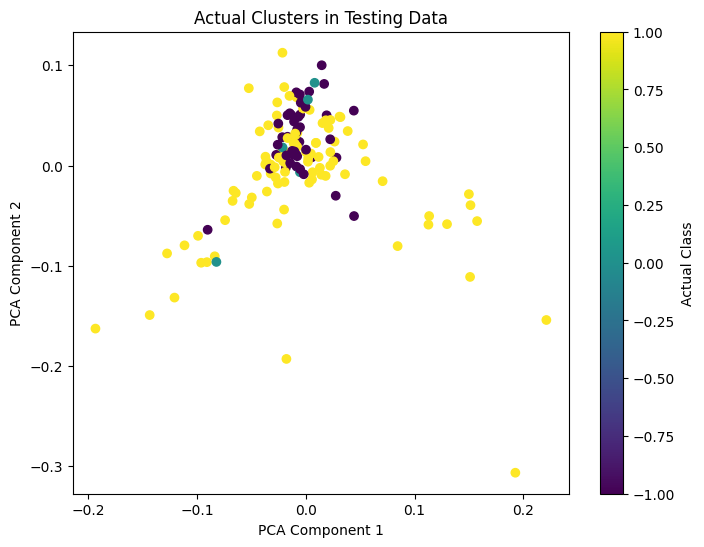

Accuracy: 0.8775510204081632
Precision: 0.8728413155719739
Recall: 0.8775510204081632
F1-score: 0.8688605162919026
Training Accuracy: 0.9111111111111111


In [69]:

# Sample data
X = dataF2.drop('new_sentiment', axis=1)
y = dataF2['new_sentiment']

# Flatten the features
X_flattened = X.values.reshape(X.shape[0], -1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the testing set
predicted_labels = knn.predict(X_test)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot the clusters for testing data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.title('Actual Clusters in Testing Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Actual Class')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predicted_labels, average='weighted')

# Calculate recall
recall = recall_score(y_test, predicted_labels, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate training accuracy
train_predicted_labels = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predicted_labels)
print("Training Accuracy:", train_accuracy)


### Naive Bayes

In [71]:

X = dataF2.drop(columns=['new_sentiment'])
y = dataF2['new_sentiment']

selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X, y)

smote = SMOTE(random_state=87)
X_resampled, y_resampled = smote.fit_resample(X_new, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=87)

param_grid = {'alpha': [0.01, 0.05, 0.1, 0.21, 0.3, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0, 5.0, 10.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

clf = grid_search.best_estimator_
print("Best Alpha:", grid_search.best_params_)

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

scores = cross_val_score(clf, X_resampled, y_resampled, cv=5)

print("Training accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing accuracy:", accuracy_score(y_test, y_test_pred))
print("Cross-Validation Scores:", scores)


Best Alpha: {'alpha': 0.01}
Precision: 0.9804550803184375
Recall: 0.9798657718120806
F1-score: 0.9797006897563295
Training accuracy: 0.9991596638655462
Testing accuracy: 0.9798657718120806
Cross-Validation Scores: [0.94966443 0.95973154 0.97651007 0.96632997 0.91245791]


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


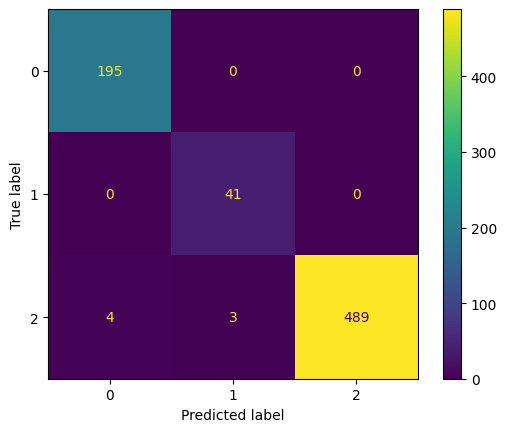

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_true = y , y_pred = clf.predict(X))).plot()

## SVM Model Implimentation

In [ ]:

X = dataF2.drop(columns=['new_sentiment'])
y = dataF2['new_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)


svm_model = SVC(C=0.74,kernel='linear',degree=2)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

scores = cross_val_score(svm_model, X, y, cv=5)

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

print("Training accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing accuracy:", accuracy_score(y_test, y_test_pred))
print("Cross-Validation Scores:", scores)

Precision: 0.8866213151927438
Recall: 0.8639455782312925
F1-score: 0.8482544532964701
Training accuracy: 0.9401709401709402
Testing accuracy: 0.8639455782312925
Cross-Validation Scores: [0.79591837 0.80272109 0.82191781 0.84246575 0.67808219]


### RNN MODEL

In [ ]:
X = dataF2.drop(columns=['new_sentiment'])
y = dataF2['new_sentiment']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],))) 
model.add(Dense(64, activation='relu'))  
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)
test_accuracy = accuracy_score(y_test, y_pred_binary)
print("Test Accuracy:", test_accuracy)

y_train_pred = model.predict(X_train)
y_train_pred_binary = np.round(y_train_pred).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
print("Training Accuracy:", train_accuracy)

precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
print("Precision:", precision)
print("Recall:", recall)


Epoch 1/4
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1061 - loss: 0.6889 - val_accuracy: 0.0508 - val_loss: 0.6722
Epoch 2/4
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1443 - loss: 0.6510 - val_accuracy: 0.0678 - val_loss: 0.6308
Epoch 3/4
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 0.5463 - val_accuracy: 0.3051 - val_loss: 0.5212
Epoch 4/4
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6611 - loss: 0.3141 - val_accuracy: 0.4068 - val_loss: 0.2961
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test Accuracy: 0.46938775510204084
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training Accuracy: 0.6974358974358974
Precision: 0.6259754738015608
Recall: 0.46938775510204084


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Logestic Regression 

In [ ]:
# X = dataF2.drop(columns=['new_sentiment'])
# y = dataF2['new_sentiment']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# poly = PolynomialFeatures(degree=2)

# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# logistic_regression_model = LogisticRegression()

# logistic_regression_model.fit(X_train_poly, y_train)
# y_pred = logistic_regression_model.predict(X_test_poly)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)

# scores = cross_val_score(logistic_regression_model, X, y, cv=5)
# y_train_pred = logistic_regression_model.predict(X_train)
# y_test_pred = logistic_regression_model.predict(X_test)

# print("Training accuracy:", accuracy_score(y_train, y_train_pred))
# print("Testing accuracy:", accuracy_score(y_test, y_test_pred))
# print("Cross-Validation Scores:", scores)

## Decesion Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming you've already imported necessary libraries and defined 'dataF2'

X = dataF2.drop(columns=['new_sentiment'])
y = dataF2['new_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

DecTree = DecisionTreeClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2)

# Train the decision tree classifier
DecTree.fit(X_train, y_train)

# Predict values
y_pred = DecTree.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

scores = cross_val_score(DecTree, X, y, cv=5)
y_train_pred = DecTree.predict(X_train)
y_test_pred = DecTree.predict(X_test)

print("Training accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing accuracy:", accuracy_score(y_test, y_test_pred))
print("Cross-Validation Scores:", scores)


Precision: 0.8186315848653511
Recall: 0.7959183673469388
F1-score: 0.7792142498024851
Training accuracy: 0.9487179487179487
Testing accuracy: 0.7959183673469388
Cross-Validation Scores: [0.7414966  0.7414966  0.78767123 0.76027397 0.64383562]


## Random forest model 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Sample data
X = dataF2.drop(columns=['new_sentiment'])
y = dataF2['new_sentiment']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(bootstrap= False, max_depth= None, min_samples_leaf= 2, min_samples_split=5, n_estimators= 200)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Additional evaluation metrics
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
scores = cross_val_score(rf_classifier, X, y, cv=5)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Cross-Validation Scores:", scores)

Training Accuracy: 0.9606837606837607
Testing Accuracy: 0.7891156462585034
Precision: 0.809905716672634
Recall: 0.7891156462585034
F1-score: 0.7636673977423393
Cross-Validation Scores: [0.78231293 0.78911565 0.81506849 0.82876712 0.67123288]


In [ ]:
import joblib 
joblib.dump(clf, "trained_model.joblib")
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']